In [1]:
from helpers import *
import pandas as pd
import numpy as np
from scipy.signal import periodogram, detrend

In [2]:
df = pd.read_csv('prepared_data.csv',parse_dates=['Date'])

In [3]:
df_coffee = df.loc[df['Product']=='Coffee',['Date','Quantity']].reset_index(drop=True)
df_tea = df.loc[df['Product']=='Tea',['Date','Quantity']].reset_index(drop=True)

## Coffee

In [4]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      181 non-null    datetime64[ns]
 1   Quantity  181 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


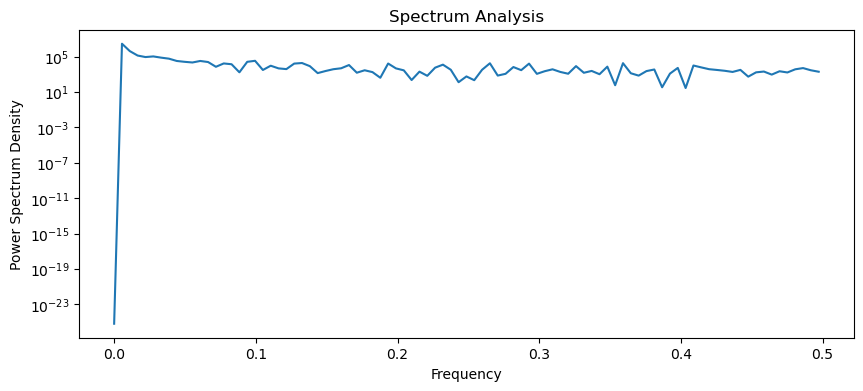

In [5]:
spectrum(df_coffee['Quantity'])

In [6]:
trend_stationary(df_coffee, 'Quantity')

ADF statistic is 0.89
the p-value of this series is 0.99 and is therefore not stationary.
We cannot reject the null hypothesis of a unit root


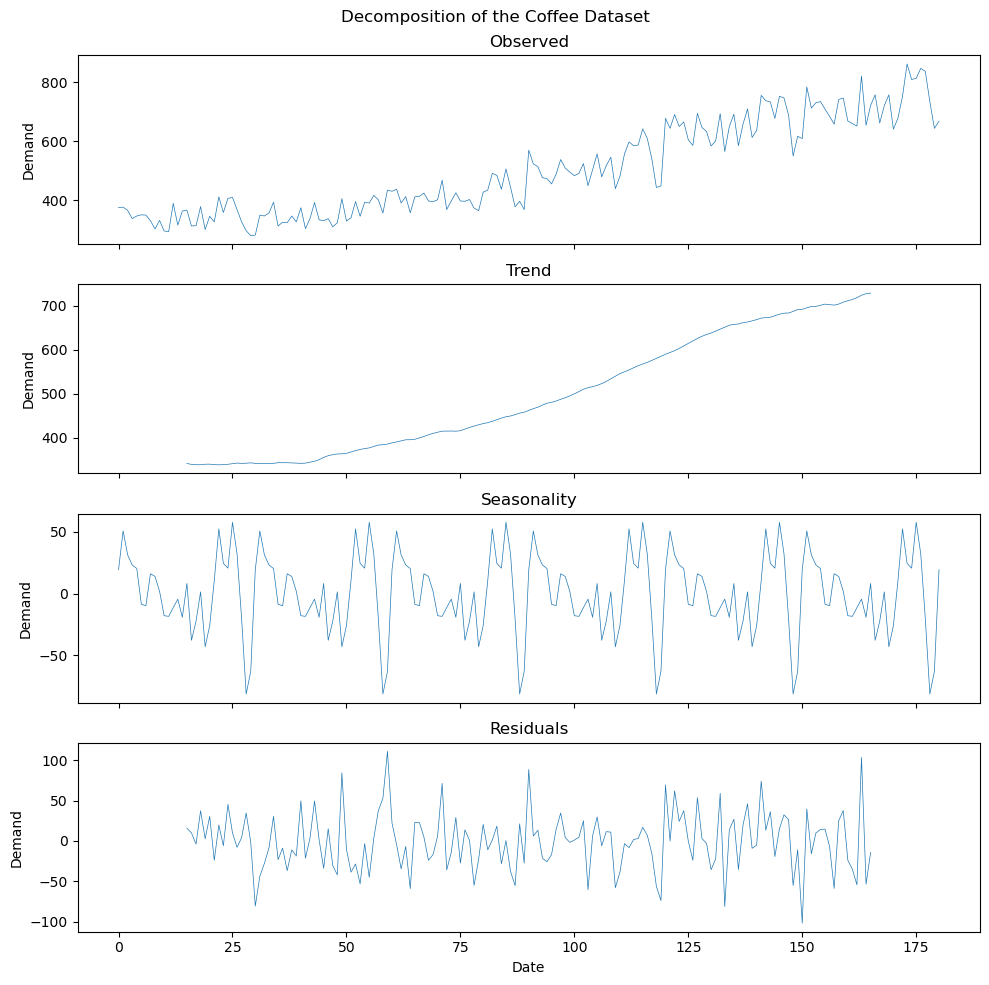

In [7]:
tsd = time_series_decomposition(df_coffee['Quantity'],period=30,plot_title="Decomposition of the Coffee Dataset",plot_y="Demand")

In [10]:
detrended = tsd.observed - tsd.trend

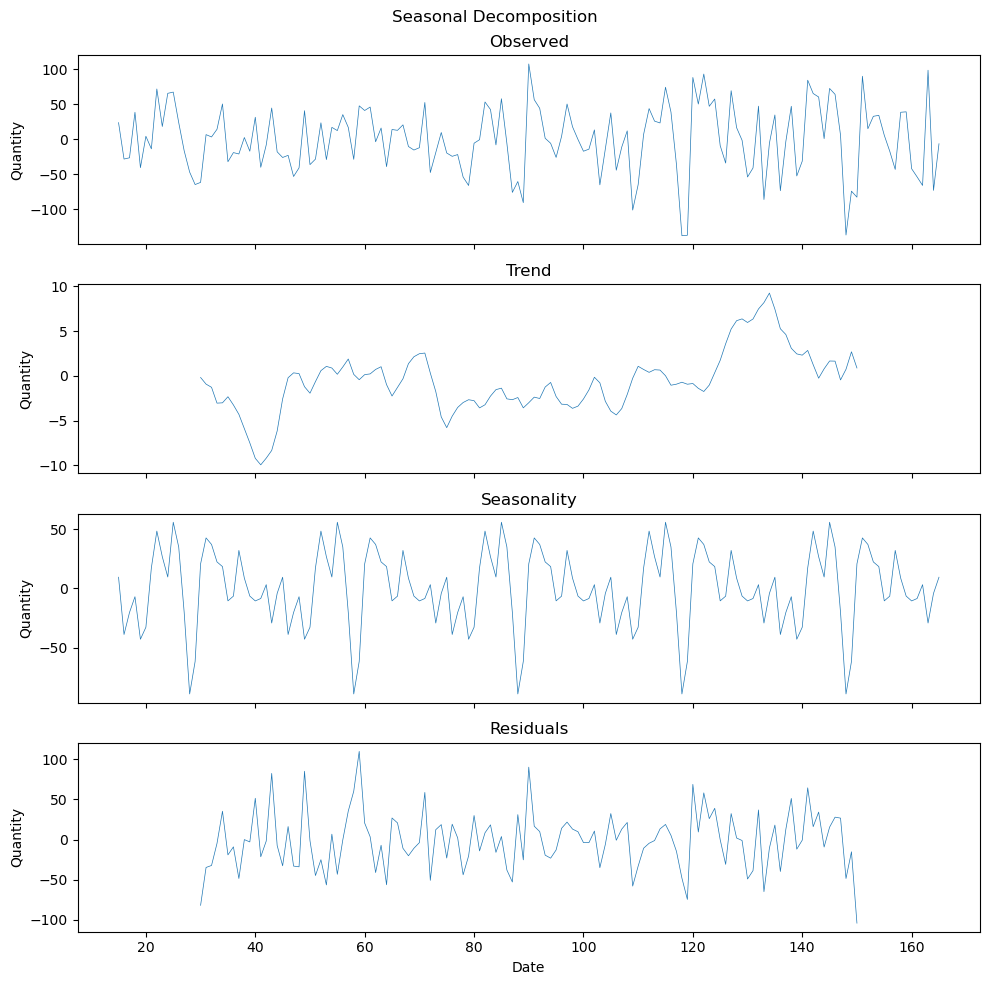

In [28]:
time_series_decomposition(detrended.dropna())

In [25]:
detrended.dropna()

15     23.966667
16    -28.016667
17    -26.250000
18     38.750000
19    -40.350000
         ...    
161   -53.516667
162   -65.683333
163    98.766667
164   -72.750000
165    -6.183333
Length: 151, dtype: float64

Peak frequency: 0.09933774834437085
Seasonal period: 10.066666666666666


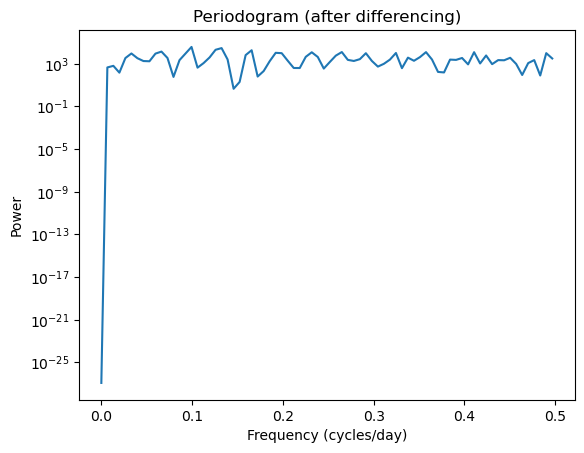

In [26]:
freqs, power = periodogram(detrended.dropna(), fs=1)

freqs_nonzero = freqs[1:]
power_nonzero = power[1:]

peak_freq = freqs_nonzero[np.argmax(power_nonzero)]
period = 1 / peak_freq

print("Peak frequency:", peak_freq)
print("Seasonal period:", period)

plt.semilogy(freqs, power)
plt.title("Periodogram (after differencing)")
plt.xlabel("Frequency (cycles/day)")
plt.ylabel("Power")
plt.show()

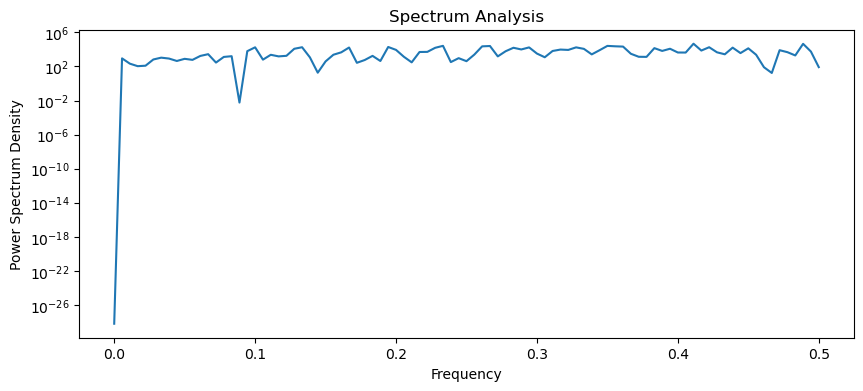

In [ ]:
spectrum(df_coffee_stationary['Quantity'])

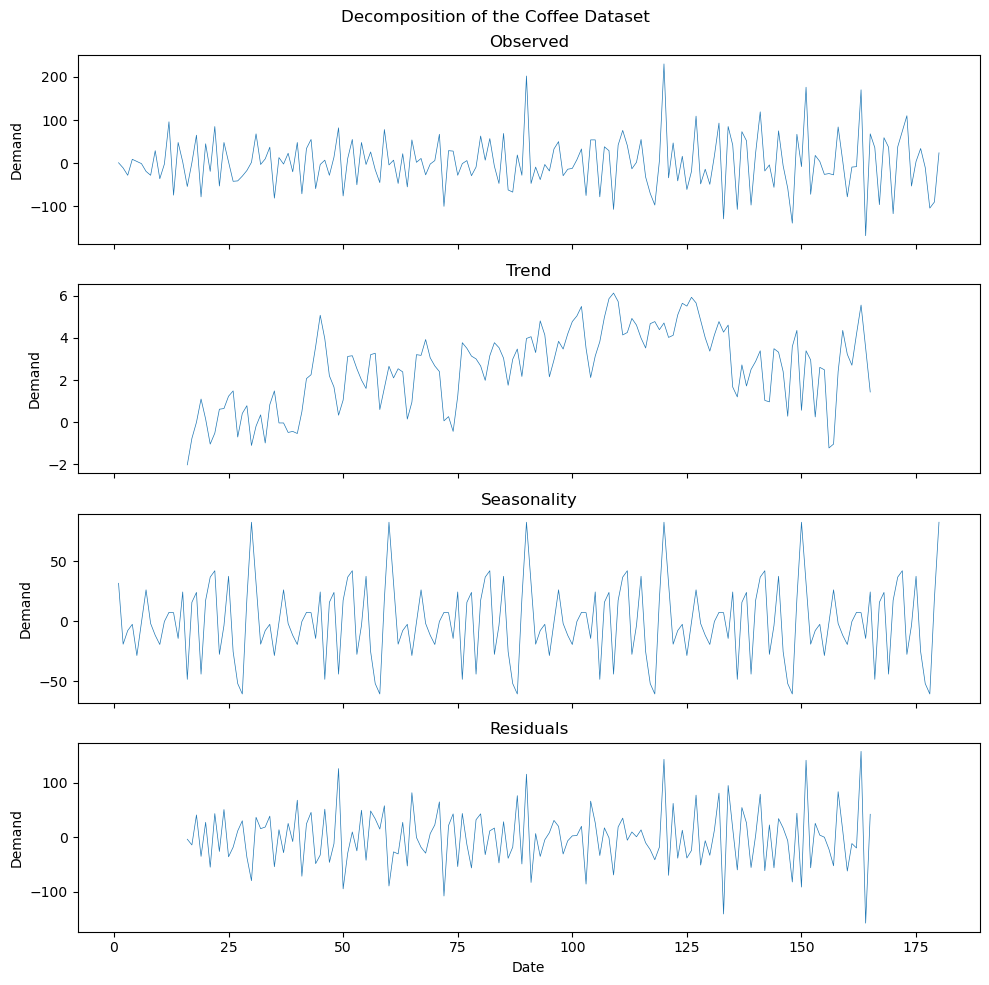

In [ ]:
time_series_decomposition(df_coffee_stationary['Quantity'],period=30,plot_title="Decomposition of the Coffee Dataset",plot_y="Demand")